In [4]:
import StringIO

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt


import tensorflow as tf

In [32]:
# Nikkei and FTSE time series

nikkei = pd.read_excel('nikkei.csv', encoding='utf-8', names = ['date', 'price'])
ftse = pd.read_excel('ftse.csv', encoding='utf-8', names = ['date', 'price'])
nikkei = nikkei.set_index("date").sort_index()
ftse = ftse.set_index("date").sort_index()

In [34]:
closing_data = pd.DataFrame()

closing_data['nikkei_close'] = nikkei['price']
closing_data['ftse_close'] = ftse['price']

closing_data = closing_data.fillna(method = 'ffill')
closing_data.describe()

,nikkei_close,ftse_close
count,1426.000000,1426.000000
mean,12555.662053,6105.237236
std,3656.852037,556.346212
min,8160.009766,4805.799805
25%,9465.320069,5682.549926
50%,10811.660156,6015.899902
75%,15209.164795,6625.374878
max,20868.029297,7104.000000


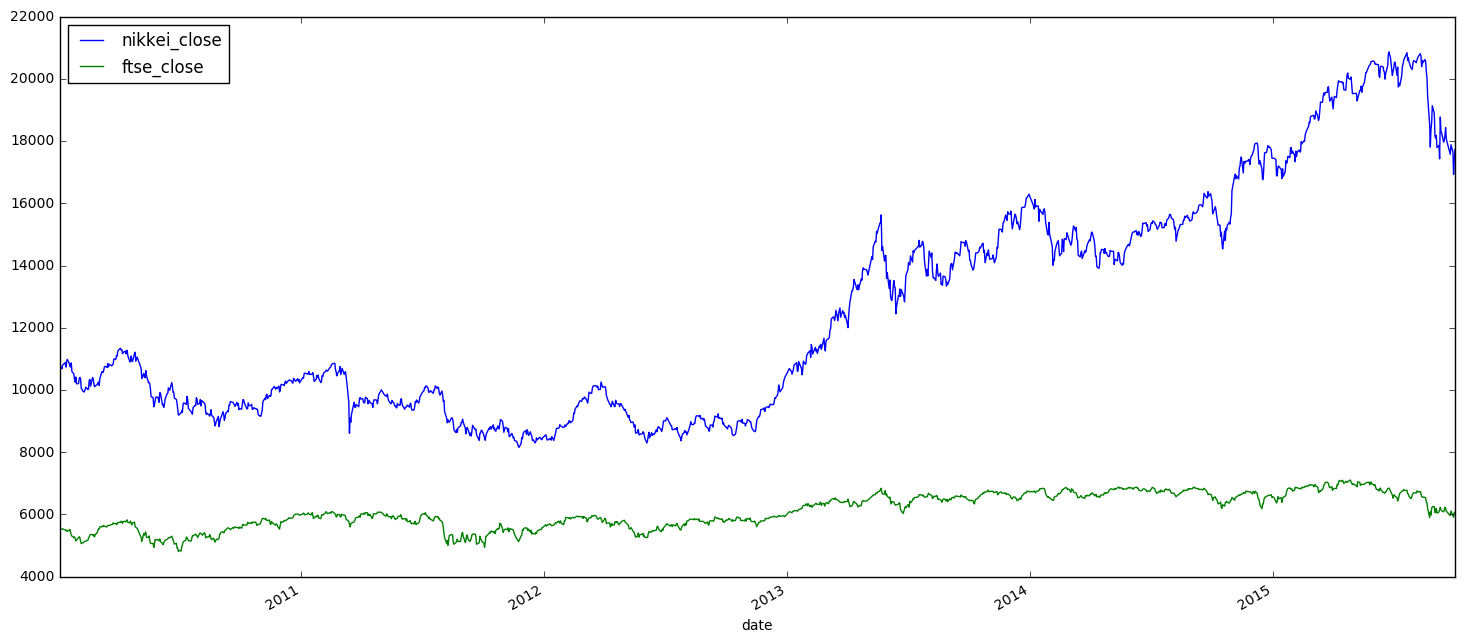

In [35]:
plt.close
t = pd.concat([closing_data['nikkei_close'],closing_data['ftse_close']],axis = 1).plot(figsize=(18,8))
plt.show()

In [36]:
# Portfolio definition

len_series = len(nikkei)

def price_vector(time_lag, t):
  return closing_data[t-time_lag:t]

def current_price_nikkei(t):
  return closing_data['nikkei_close'][t]

def current_price_ftse(t):
  return closing_data['ftse_close'][t]

def portfolio_value(portfolio_shares, t):
  prices = [current_price_nikkei(t), current_price_ftse(t)]
  print(type(prices), type(portfolio_shares))
  return np.inner(portfolio_shares,prices);

def alpha_fun(shares,t):
  alpha = shares[0]*current_price_nikkei(t)/portfolio_value(shares,t)
  return alpha

In [37]:
# Buy and Hold strategy [Nikkei only]

initial_endowment = current_price_nikkei(0)
investment_percentage = 1;
amount_invested = initial_endowment * investment_percentage

# Nikkei only - invest all

nikkei_0 =amount_invested/current_price_nikkei(0)
ftse_0 = 0
shares_0 = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested

state_nikkei = pd.DataFrame()

state_nikkei['price_nikkei'] = np.zeros(len_series)
state_nikkei['price_ftse'] = np.zeros(len_series)
state_nikkei['portfolio_shares_nikkei'] = np.zeros(len_series)
state_nikkei['portfolio_shares_ftse'] = np.zeros(len_series)
state_nikkei['value_nikkei'] = np.zeros(len_series)
state_nikkei['alpha'] = np.ones(len_series)
state_nikkei['cash'] = np.zeros(len_series)

state_nikkei['price_nikkei'][0] = current_price_nikkei(0)
state_nikkei['price_ftse'][0] = current_price_ftse(0)
state_nikkei['portfolio_shares_nikkei'] = shares_0[0] * np.ones(len_series)
state_nikkei['portfolio_shares_ftse'] = shares_0[1] *np.ones(len_series)
state_nikkei['value_nikkei'][0] = value_0

for time in range(len_series):
  state_nikkei['price_nikkei'][time] = current_price_nikkei(time)
  state_nikkei['price_ftse'][time] = current_price_ftse(time)
  state_nikkei['value_nikkei'][time] = portfolio_value(shares_0,time)


(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type '

In [38]:
# Buy and Hold strategy [Ftse only]

initial_endowment = current_price_nikkei(0)
investment_percentage = 1;
amount_invested = initial_endowment*investment_percentage

# Ftse only - invest all

nikkei_0 =0
ftse_0 = amount_invested/current_price_ftse(0)
shares_0 = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested

state_ftse = pd.DataFrame()

state_ftse['price_nikkei'] = np.zeros(len_series)
state_ftse['price_ftse'] = np.zeros(len_series)
state_ftse['portfolio_shares_nikkei'] = np.zeros(len_series)
state_ftse['portfolio_shares_ftse'] = np.zeros(len_series)
state_ftse['value_ftse'] = np.zeros(len_series)
state_ftse['alpha'] = np.ones(len_series)
state_ftse['cash'] = np.zeros(len_series)

state_ftse['price_nikkei'][0] = current_price_nikkei(0)
state_ftse['price_ftse'][0] = current_price_ftse(0)
state_ftse['portfolio_shares_nikkei'] = shares_0[0] * np.ones(len_series)
state_ftse['portfolio_shares_ftse'] = shares_0[1] *np.ones(len_series)
state_ftse['value_ftse'][0] = value_0

for time in range(len_series):
    state_ftse['price_nikkei'][time] = current_price_nikkei(time)
    state_ftse['price_ftse'][time] = current_price_ftse(time)
    state_ftse['value_ftse'][time] = portfolio_value(shares_0,time)

(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type '

In [39]:
# buy and hold [alpha = .5]

investment_percentage = 1;
amount_invested = initial_endowment*investment_percentage

nikkei_0 = amount_invested/(2*current_price_nikkei(0))
ftse_0 = nikkei_0*current_price_nikkei(0)/current_price_ftse(0)
shares_0 = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested

state_bh = pd.DataFrame()

state_bh['price_nikkei'] = np.zeros(len_series)
state_bh['price_ftse'] = np.zeros(len_series)
state_bh['portfolio_shares_nikkei'] = nikkei_0*np.ones(len_series)
state_bh['portfolio_shares_ftse'] = ftse_0*np.ones(len_series)
state_bh['value_bh'] = np.zeros(len_series)
state_bh['alpha'] = np.zeros(len_series)
state_bh['cash'] = np.zeros(len_series)

for time in range(len_series):
  state_bh['price_nikkei'][time] = current_price_nikkei(time)
  state_bh['price_ftse'][time] = current_price_ftse(time)
  state_bh['value_bh'][time] = portfolio_value(shares_0,time)
  state_bh['alpha'][time] = alpha_fun(shares_0,time)
  state_bh['cash'][time] = cash_0

#state_bh['value'].plot(figsize=(18,8))


_ = pd.concat([state_nikkei['value_nikkei'],state_ftse['value_ftse']],axis = 1).plot(figsize=(18,8))

_ = pd.concat([state_nikkei['value_nikkei'],state_ftse['value_ftse'],state_bh['value_bh']],axis = 1).plot(figsize=(18,8))


(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type '

In [ ]:
# RL Algo

# Reward function

def reward_function(time):
  return portfolio_value(time) - portfolio_value(time-1)

def new_shares(previous_shares, action, time):
  prev_shares_instrument_0 =  previous_shares[0]
  prev_shares_instrument_1 = previous_shares[1]
  
  prev_price_instrument_0 = current_price_nikkei(time-1)
  prev_price_instrument_1 = current_price_ftse(time-1)
  
  prev_portfolio_value = portfolio_value(previous_shares, time-1)
  
  new_shares_instrument_0 = prev_shares_instrument_0 + action * prev_portfolio_value / prev_price_instrument_0
  new_shares_instrument_1 = prev_shares_instrument_1 - action * prev_portfolio_value / prev_price_instrument_1

  return [new_shares_instrument_0, new_shares_instrument_1]

def valid_actions(current_shares,time):
  action_range = list(np.linspace(-.4, .4, num=20))
  # action_range = [-.3,-.2,-.1, 0 , .1, .2, .3]
  valid_actions_list = [];
  for action in action_range:
    x_0 = new_shares(current_shares, action,time)[0]
    x_1 = new_shares(current_shares, action,time)[1]
    # print x_0,x_1
    if(x_0>0 and x_1>0):
      valid_actions_list.append(action)
  return valid_actions_list

In [40]:
# Greedy investor: if at t = time - lag I had access to price evolution over the time window {time-lag, time-lag+1,...,time} and I had to pick the composition of portfolio which maximized the average value portfolio value over this window, without rebalancing, what would I pick

def rebalanced_value(action, current_shares, lag, transaction_cost, time):
    rebalanced_shares = new_shares(current_shares, action, time+1)
    new_value = 0;
    for l in range(lag):
        new_value += portfolio_value(rebalanced_shares, time-l)
    rebalanced_value = new_value/lag - transaction_cost ### make it depend on number of stocks traded
    return rebalanced_value

  
# Make greedy action according to the value that portfolio would have had if its composition would have differred by moving action% of current value from asset 0 to asset 1

def greedy_action(current_shares, lag, transaction_cost, time):
    actions = valid_actions(current_shares, time);
    greedy_guess = portfolio_value(current_shares, time)
    greedy_action = 0;
    for action in actions:
        value_action = rebalanced_value(action, current_shares, lag, transaction_cost, time)
        if value_action>greedy_guess:
            greedy_action = action
    return greedy_action

In [41]:
# The greedy investor: initialize portfolio at balanced alpha and be greedy

investment_percentage = 1;
amount_invested = initial_endowment*investment_percentage
lag = 20
nikkei_0 = amount_invested/(2*current_price_nikkei(0))
ftse_0 = nikkei_0*current_price_nikkei(0)/current_price_ftse(0)
shares_0 = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested
transaction_cost = .01;
state_greedy = pd.DataFrame()

state_greedy['price_nikkei'] = np.zeros(len_series)
state_greedy['price_ftse'] = np.zeros(len_series)
state_greedy['portfolio_shares_nikkei'] = nikkei_0*np.ones(len_series)
state_greedy['portfolio_shares_ftse'] = ftse_0*np.ones(len_series)
state_greedy['action_greedy'] = np.zeros(len_series)
state_greedy['value_greedy'] = np.zeros(len_series)
state_greedy['alpha'] = np.zeros(len_series)
state_greedy['cash'] = np.zeros(len_series)

current_shares = list([state_greedy['portfolio_shares_nikkei'][0], state_greedy['portfolio_shares_ftse'][0]])
time_range = range(lag,len_series)

for time in range(lag):
  state_greedy['price_nikkei'][time] = current_price_nikkei(time)
  state_greedy['price_ftse'][time] = current_price_ftse(time)
  state_greedy['value_greedy'][time] = portfolio_value(shares_0,time)
  state_greedy['alpha'][time] = alpha_fun(shares_0,time)
  state_greedy['cash'][time] = cash_0
  
current_shares = shares_0
for time in time_range:
  state_greedy['price_nikkei'][time] = current_price_nikkei(time)
  state_greedy['price_ftse'][time] = current_price_ftse(time)
  act = greedy_action(current_shares, lag, transaction_cost, time)
  state_greedy['action_greedy'][time] = act
  new_sh = new_shares(current_shares, act, time)
  state_greedy['portfolio_shares_nikkei'][time] = new_sh[0]
  state_greedy['portfolio_shares_ftse'][time] = new_sh[1]
  state_greedy['value_greedy'][time] = portfolio_value(new_sh, time)
  state_greedy['alpha'][time] = alpha_fun(new_sh, time)
  state_greedy['cash'][time] = cash_0
  current_shares = new_sh

(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type '

NameError: global name 'valid_actions' is not defined

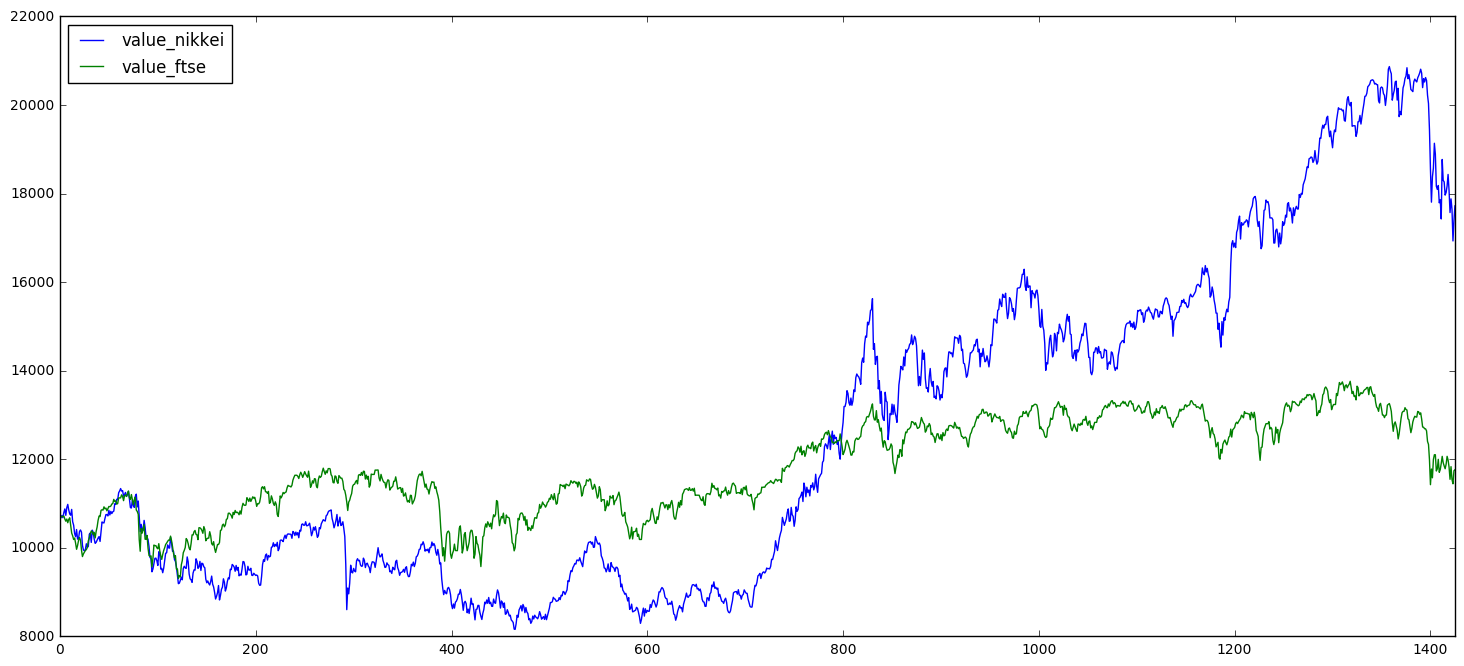

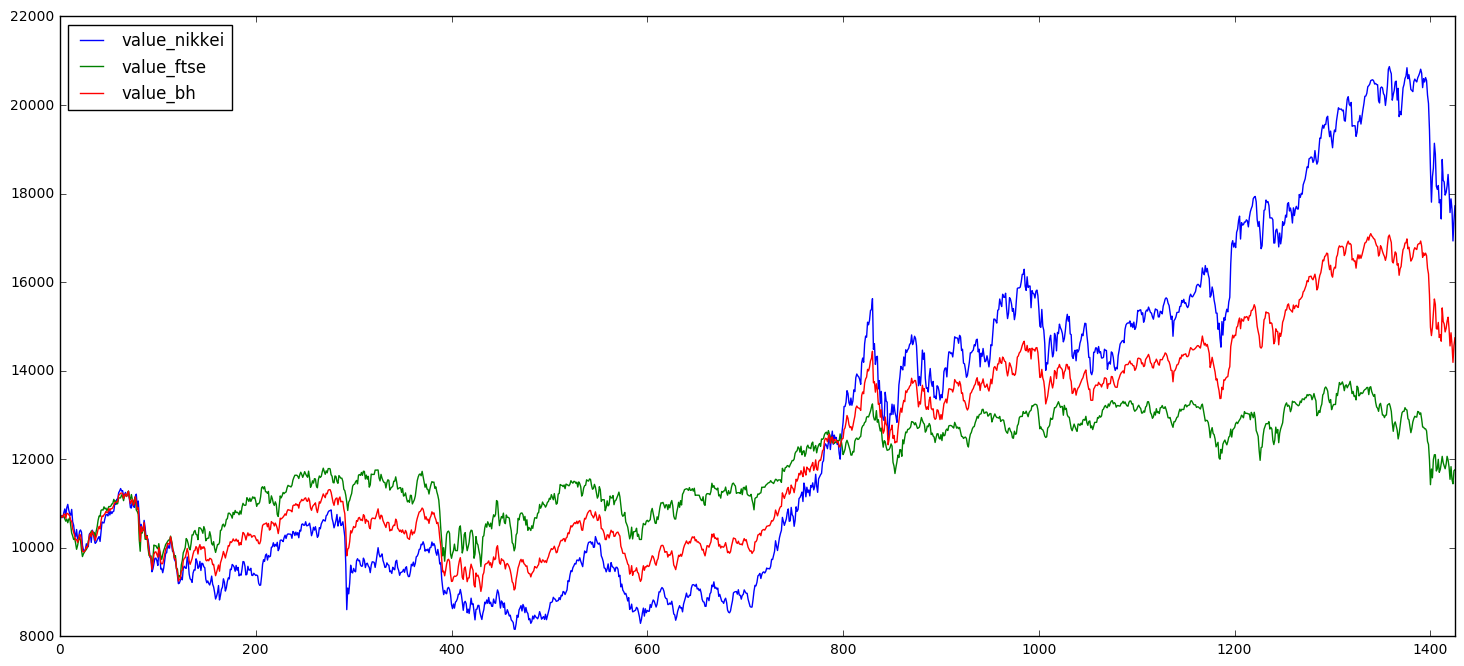

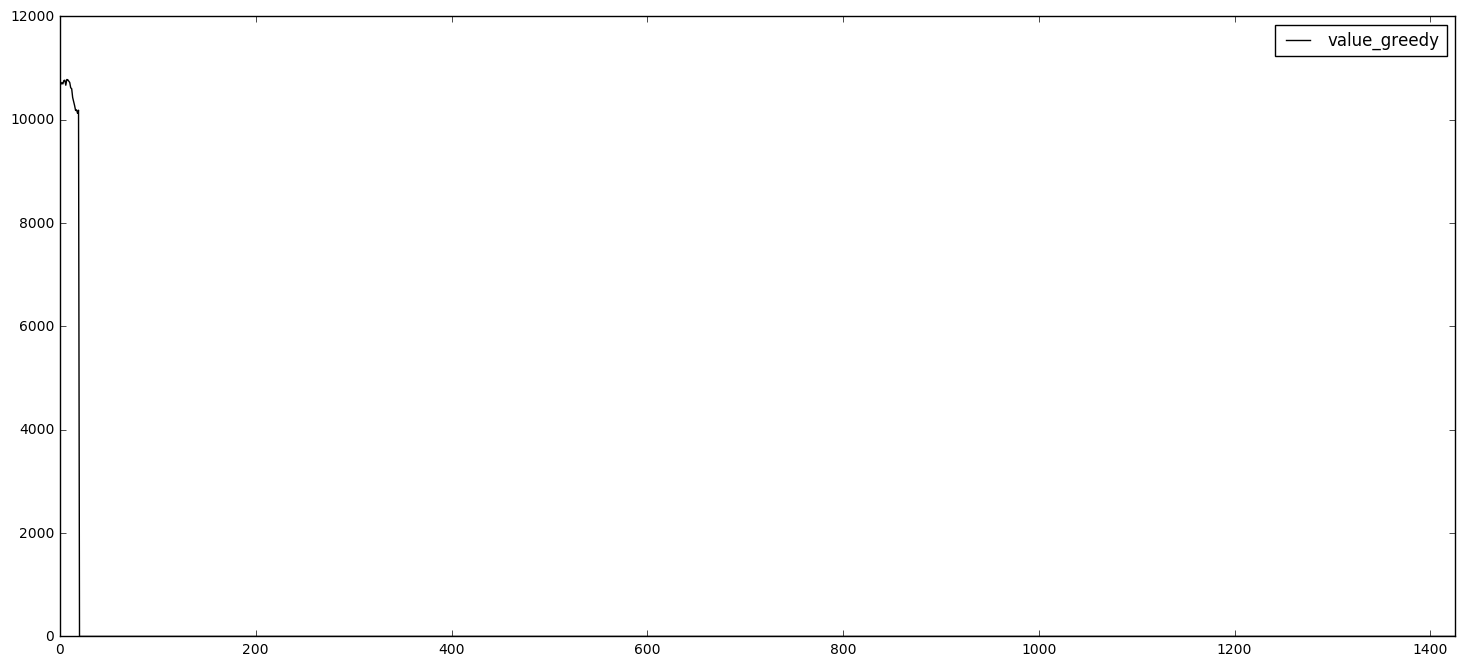

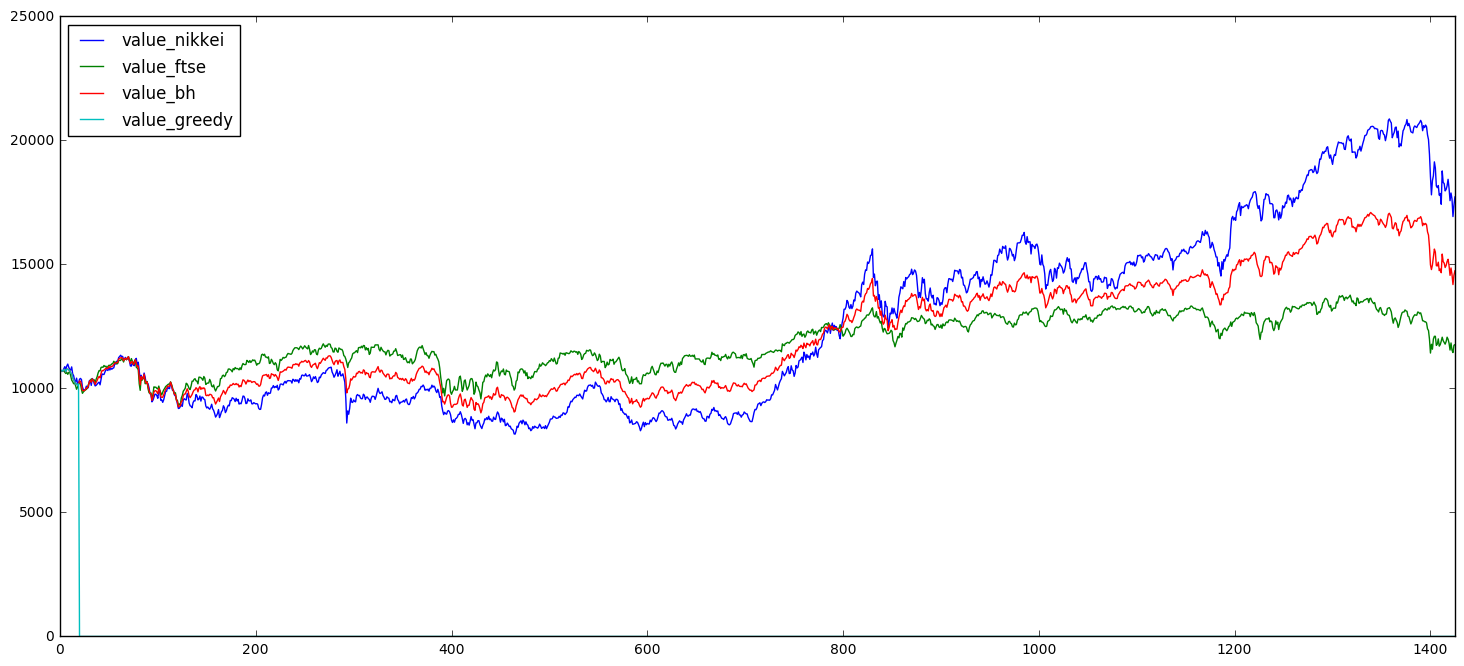

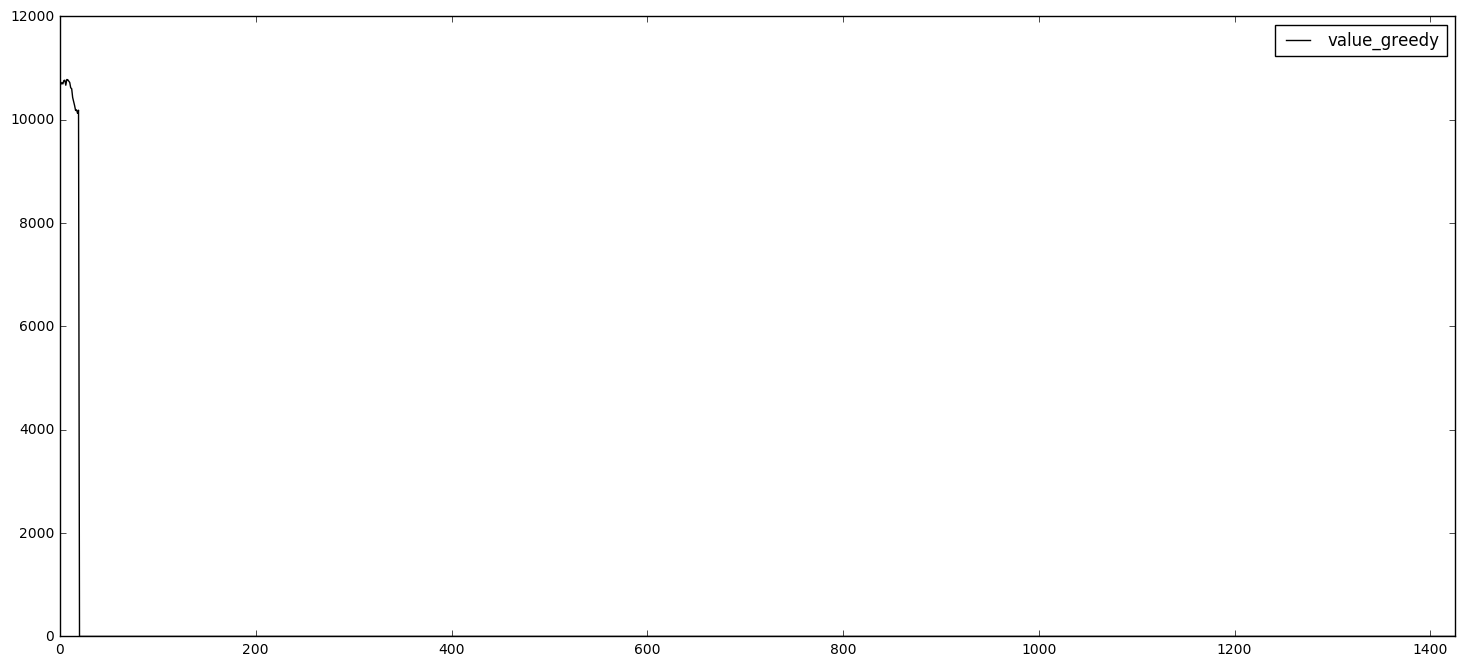

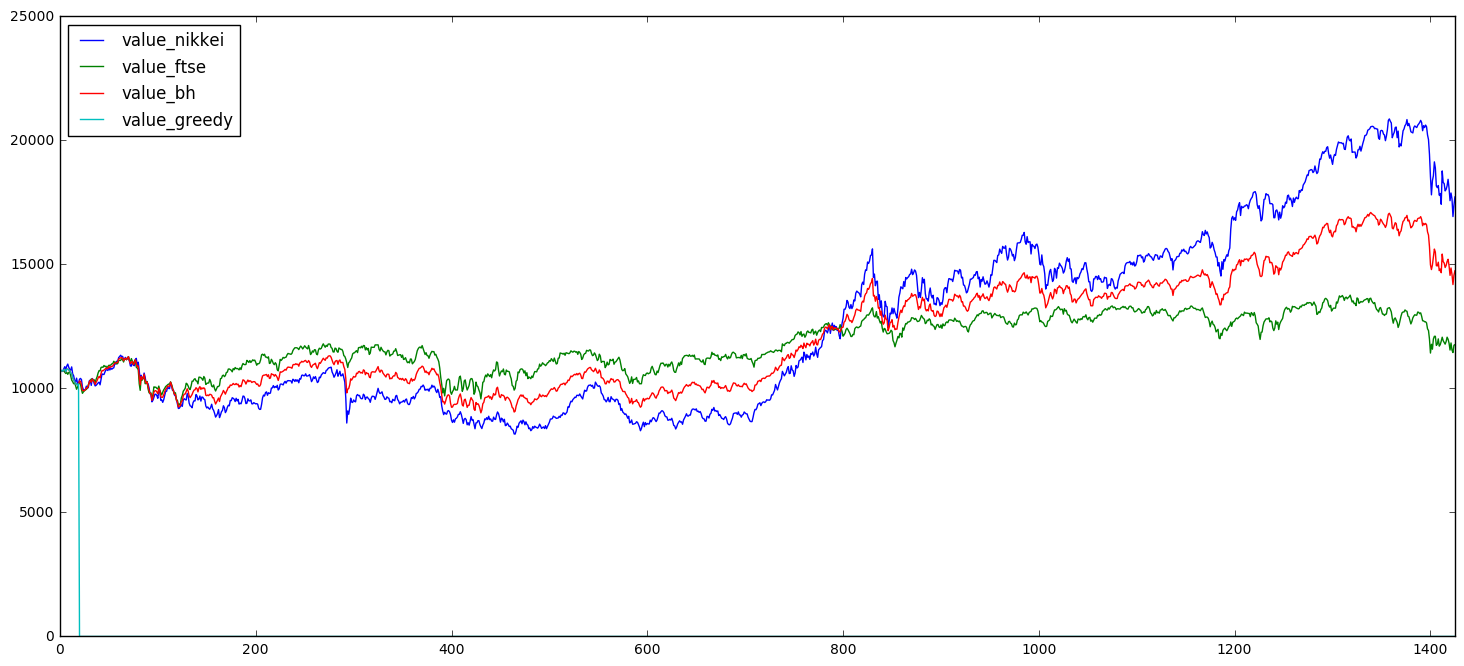

In [43]:
_ = pd.concat([state_greedy['value_greedy']], axis = 1).plot(figsize=(18,8), color = 'black')
_ = pd.concat([state_nikkei['value_nikkei'], state_ftse['value_ftse'], state_bh['value_bh'], state_greedy['value_greedy']],axis = 1).plot(figsize=(18,8))
np.count_nonzero(state_greedy['action_greedy'])/float(len_series)
plt.show()

In [ ]:
# state_nostradamus: buy only ftse until 774 and only nikkei henceforth

# Buy and Hold strategy [Ftse only]

initial_endowment = current_price_nikkei(0)
investment_percentage = 1;
amount_invested = initial_endowment*investment_percentage
shift_time = 774

# Ftse only - invest all

nikkei_0 = 0
ftse_0 = amount_invested/current_price_ftse(0)
shares_0 = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested

state_nostradamus = pd.DataFrame()

state_nostradamus['price_nikkei'] = np.zeros(len_series)
state_nostradamus['price_ftse'] = np.zeros(len_series)
state_nostradamus['portfolio_shares_nikkei'] = np.zeros(len_series)
state_nostradamus['portfolio_shares_ftse'] = np.zeros(len_series)
state_nostradamus['value_nostradamus'] = np.zeros(len_series)
state_nostradamus['alpha'] = np.ones(len_series)
state_nostradamus['cash'] = np.zeros(len_series)

state_nostradamus['price_nikkei'][0] = current_price_nikkei(0)
state_nostradamus['price_ftse'][0] = current_price_ftse(0)
state_nostradamus['portfolio_shares_nikkei'] = shares_0[0] * np.ones(len_series)
state_nostradamus['portfolio_shares_ftse'] = shares_0[1] *np.ones(len_series)
state_nostradamus['value_nostradamus'][0] = value_0



for time in range(shift_time):
    state_nostradamus['price_nikkei'][time] = current_price_nikkei(time)
    state_nostradamus['price_ftse'][time] = current_price_ftse(time)
    state_nostradamus['value_nostradamus'][time] = portfolio_value(shares_0,time)

nikkei_1 = state_nostradamus['portfolio_shares_nikkei'][shift_time] = state_nostradamus['value_nostradamus'][shift_time - 1] / current_price_nikkei(shift_time)
ftse_1 = state_nostradamus['portfolio_shares_ftse'][shift_time] = 0    
shares_1 = [nikkei_1,ftse_1] 

for time in range(shift_time, len_series):
    state_nostradamus['price_nikkei'][time] = current_price_nikkei(time)
    state_nostradamus['price_ftse'][time] = current_price_ftse(time)
    state_nostradamus['value_nostradamus'][time] = portfolio_value(shares_1,time)

In [ ]:
_ = pd.concat([state_nostradamus['value_nostradamus']], axis = 1).plot(figsize=(18,8), color = 'black')
_ = pd.concat([state_nikkei['value_nikkei'], state_ftse['value_ftse'], state_bh['value_bh'], state_greedy['value_greedy'], state_nostradamus['value_nostradamus']],axis = 1).plot(figsize=(18,8))

In [34]:
def current_state_RL(shares_prev_step, previous_greedy_action, time_lag, time):
  state = {}
  state["price_vector"] = price_vector(time_lag,time)
  state["shares"] = new_shares(shares_prev_step, previous_greedy_action, time)
  state["value_RL"] = portfolio_value(state["shares"], time)
  state["alpha"] = alpha_fun(state["shares"], time)
  state["cash"] = 0
  return state

def greedy_action_RL(function_input, action_space, model):
  max_action_val = -10e5;
  best_action = null;
  for action in action_space:
    action_val = model(function_input, action);
    if action_val > max_action_val:
      max_action_val = action_val;
      best_action = action;
  return action

state_RL = pd.DataFrame()

state_RL['price_nikkei'] = np.zeros(len_series)
state_RL['price_ftse'] = np.zeros(len_series)
state_RL['portfolio_shares_nikkei'] = np.zeros(len_series)
state_RL['portfolio_shares_ftse'] = np.zeros(len_series)
state_RL['value_RL'] = np.zeros(len_series)
state_RL['alpha'] = np.ones(len_series)
state_RL['cash'] = np.zeros(len_series)


from sklearn import linear_model as lm
time_lag = 5 # number of previous time steps included in prediction
tau = .1
theta_0 = np.zeros(time_lag+1)
investment_percentage = 1;
amount_invested = initial_endowment*investment_percentage

nikkei_0 = amount_invested/(2*current_price_nikkei(0))
ftse_0 = nikkei_0*current_price_nikkei(0)/current_price_ftse(0)
shares_prev_step = [nikkei_0, ftse_0]
value_0 = portfolio_value(shares_0,0)
alpha_0 = alpha_fun(shares_0,0)
cash_0 = initial_endowment - amount_invested

for time in range(time_lag):
  print(time)
  state_RL['price_nikkei'][time] = current_price_nikkei(time)
  state_RL['price_ftse'][time] = current_price_ftse(time)
  state_RL['portfolio_shares_nikkei'] = shares_0[0]
  state_RL['portfolio_shares_ftse'] = shares_0[1]
  state_RL['value_RL'][time] = portfolio_value(shares_0,time)

previous_greedy_action = valid_actions(shares_0, time_lag)
function_input = list(state_RL['price_nikkei'][0:time_lag]) + list(state_RL['price_ftse'][0:time_lag]) + [state_RL['value_RL'][time_lag]]

# for time in range(time_lag,len_series):
#   state = current_state_RL(shares_prev_step, previous_greedy_action, time_lag, time)

(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
0
(<type 'list'>, <type 'list'>)
1


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(<type 'list'>, <type 'list'>)
2
(<type 'list'>, <type 'list'>)
3
(<type 'list'>, <type 'list'>)
4
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<type 'list'>, <type 'list'>)
(<

In [35]:
state_RL

,price_nikkei,price_ftse,portfolio_shares_nikkei,portfolio_shares_ftse,value_RL,alpha,cash
0,10654.790039,5500.299805,0,1.937129,10654.790039,1.0,0.0
1,10681.830078,5522.500000,0,1.937129,10697.794680,1.0,0.0
2,10731.450195,5530.000000,0,1.937129,10712.323147,1.0,0.0
3,10681.660156,5526.700195,0,1.937129,10705.930999,1.0,0.0
4,10798.320312,5534.200195,0,1.937129,10720.459466,1.0,0.0
5,0.000000,0.000000,0,1.937129,0.000000,1.0,0.0
6,0.000000,0.000000,0,1.937129,0.000000,1.0,0.0
7,0.000000,0.000000,0,1.937129,0.000000,1.0,0.0
8,0.000000,0.000000,0,1.937129,0.000000,1.0,0.0
9,0.000000,0.000000,0,1.937129,0.000000,1.0,0.0
